# PYTHON PROGRAMMING FUNDAMENTALS 


# STEP 0: 데이터셋

- 데이터는 미국의 아보카도 리테일 데이터 입니다. (weekly 2018 retail scan data for National retail volume (units) and price)
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. - 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost

컬럼 설명 :

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold 
- 4046 - Total number of avocados with PLU 4046 sold - PLU는 농산물 코드입니다
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

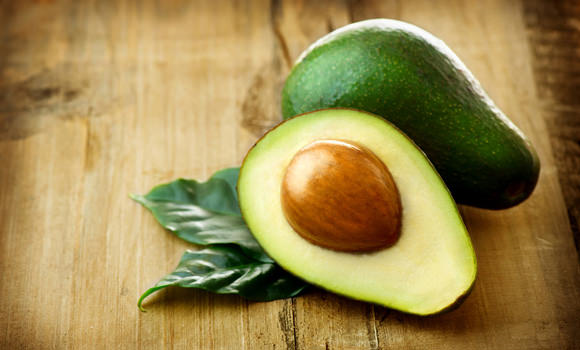

# STEP 1: 데이터 임포팅

##### 아나콘다 프롬프트를 실행합니다.

     
- 콘다로 설치합니다. : 

    conda install pystan
    
    conda install -c conda-forge fbprophet
    
    

- ( 다른 설치 )

    pip install fbprophet
    
    

##### Prophet 은 페이스북에서 만든 오픈소스소프트웨어 입니다.  

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet 시계열과 관련있는 데이터를 처리하는데 최고입니다. 

- 참고 : https://research.fb.com/prophet-forecasting-at-scale/
- 참고 : https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [29]:
# import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import seaborn as sb
from fbprophet import Prophet


### 위를 실행했을때, 다음과 같은 에러 발생하면,
ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.

### pip install --upgrade plotly  실행.

In [30]:
avocado_df = pd.read_csv('avocado.csv', index_col = 0)

In [31]:
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [32]:
avocado_df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# 실습 1. Date 컬럼으로 정렬하기 (데이터를 확인해 보면, Date 가 뒤죽박죽입니다.)

In [33]:
avocado_df.sort_values(by='Date')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


# 실습 2. Date를 x축, AveragePrice를 y축으로 plot 그리세요.

In [34]:
avocado_df.shape

(18249, 13)

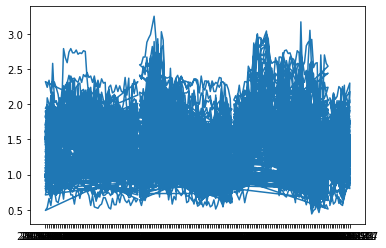

In [35]:
plt.plot(avocado_df['Date'], avocado_df.AveragePrice)

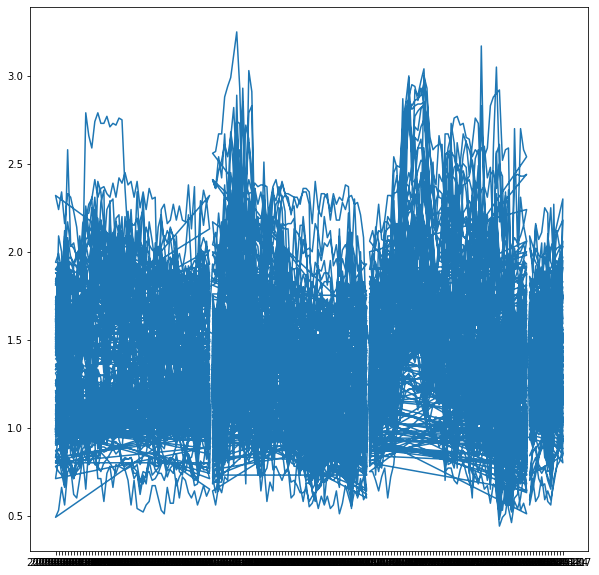

In [36]:
plt.figure(figsize = (10,10))
plt.plot(avocado_df.Date,avocado_df.AveragePrice )

In [37]:
avocado_df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

# 실습 3. 각 region 별로 몇개의 데이터가 있는지를 그래프로 나타내세요.

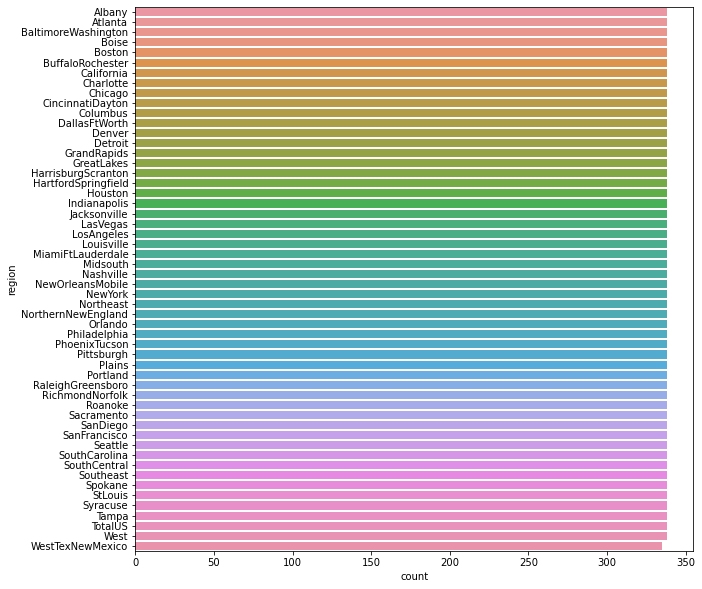

In [38]:
plt.figure(figsize=(10,10))
sb.countplot(data = avocado_df, y='region')
plt.show()

# 실습 4. 각 년도별로 몇개의 데이터가 있는지를 그래프로 나타내세요.

In [39]:
avocado_df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

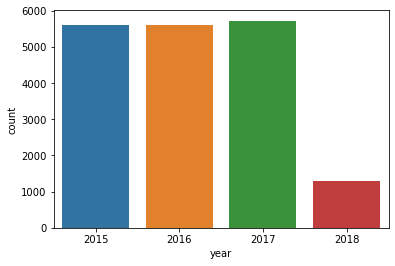

In [40]:
sb.countplot(data = avocado_df, x = 'year')
plt.show()

# 실습 5. Date 와 AveragePrice 두개의 열만 포함하는 데이터프레임을 만드세요.

In [41]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

# Prophet 를 사용하여 예측하려 합니다. 그러려면, 컬럼명을 다음처럼 꼭 바꿔줘야 합니다.

# 실습 6. Date컬럼명을 ds로,  AveragePrice컬럼명을  y로 리네임(rename) 하세요.

In [43]:
avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'}, inplace = True)

In [44]:
avocado_prophet_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
7,2018-02-04,1.63
8,2018-01-28,1.71
9,2018-01-21,1.87
10,2018-01-14,1.93


# .실습 7. Prophet 를 이용해서, 학습 시킵니다.

# .실습 8. Prophet 를 이용해서, 미래를 예측합니다.

# 실습 8. region 이 West 인 데이터만 가져옵니다.

# 실습 9. Date로 정렬합니다.

# 실습 10. plot을 그립니다.  Date가 x축, AveragePrice 를 y축으로 그립니다.

# 실습 11. 예측을 위해 컬럼명을 바꿉니다. Date 를 ds 로, AveragePrice 를 y 로 바꿉니다.

# 실습 12. 데이터를 학습시킨 후, 365일치 데이터를 만든 후, forecast 변수에 예측한 값을 저장 하세요.

# 실습 13. Prophet 의 plot 함수로 화면에 그래프로 나타내세요. (xlabel='Date', ylabel='Price' )

# 실습 14. 월별, 년도별 예측 그래프를 보여주세요.

# GREAT JOB, KEEP UP THE GREAT WORK!